# 6월 23일

In [67]:
# Kmeans
import numpy as np # 계산용 
import matplotlib.pyplot as plt # 그래프
from sklearn.cluster import KMeans # 군집화 알고리즘
from sklearn.datasets import make_blobs # 군집 연습용 데이터 

In [58]:
# 데이터 생성 
n_sample = 300  # 데이터 300개
n_clusters = 3  #군집(클러스터) 3개

# n_samples = 데이터 양, centers 클러스터 개수, random_state 결과값 고정, 디폴트 2차원 
x,y = make_blobs(n_samples=n_sample, centers=n_clusters,random_state=42)


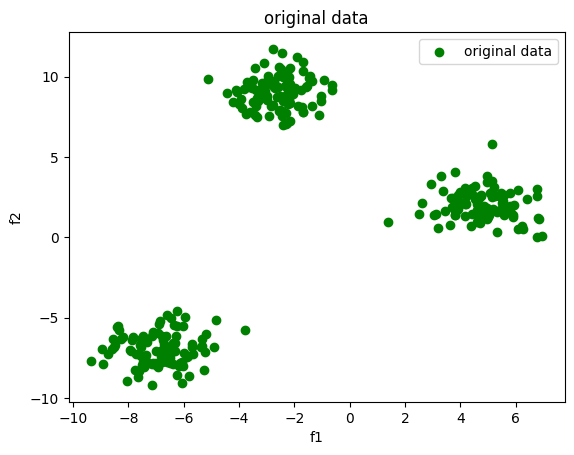

In [68]:
# 그래프

plt.scatter(x[:,0], x[:,1], c='green',label = 'original data')
plt.title('original data')
plt.legend() # label = 'original data' 표시
plt.xlabel('f1')
plt.ylabel('f2')
plt.show()

In [60]:
# KMeans 객체 생성 -> 학습
# 평균 군집하 알고리즘 설정( 클러스트 3개)
Kmeans = KMeans(n_clusters=3, random_state=42)

In [71]:
# 학습
cluster_label = Kmeans.fit_predict(x) 

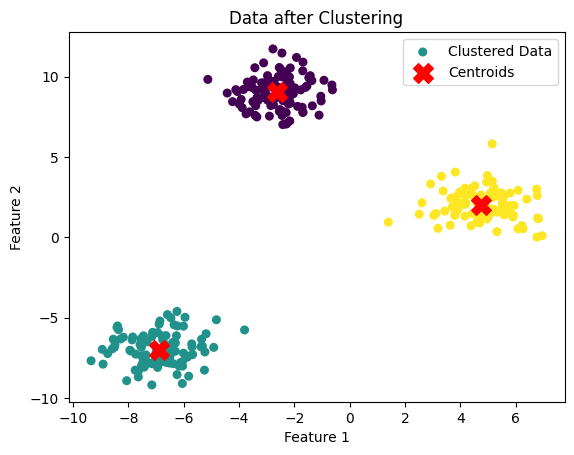

In [74]:
# 군집화 결과 시각화
# 각 데이터 포인트의 클러스터에 따라 색을 지정

plt.scatter(x[:, 0], x[:, 1], c=cluster_label, cmap='viridis', s=30, label="Clustered Data")
# 클러스터 중심 시각화
plt.scatter(Kmeans.cluster_centers_[:, 0], Kmeans.cluster_centers_[:, 1], s=200, c='red', label="Centroids", marker='X')
plt.title("Data after Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

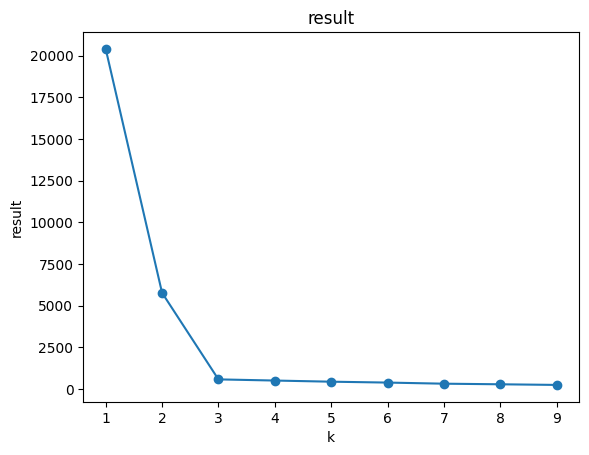

In [ ]:
# 최적의 K 찾기 
result =[]

for k in range(1,10):
    kmeans_temp = KMeans(n_clusters=k,random_state=42)
    kmeans_temp.fit_predict(x) #내부적으로 학습 후 전달
    result.append(kmeans_temp.inertia_)

plt.plot(range(1,10), result, marker='o')
plt.title('result')
plt.xlabel('k')
plt.ylabel('result')
plt.show()



#데이터가 많고 특성이 많으면 한계가 있다.

# 2

In [64]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [ ]:
data, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6,random_state=42)


In [78]:
# 3. 클러스터 품질 평가 - 실루엣 점수 계산
# - silhouette_score: 전체 데이터에 대한 평균 실루엣 점수를 계산
silhouette_avg = silhouette_score(data, cluster_label)
print(f"Overall Silhouette Score: {silhouette_avg}")
# 4. 실루엣 점수 시각화 - 각 데이터 포인트의 실루엣 점수를 계산
silhouette_values = silhouette_samples(x, cluster_label)


Overall Silhouette Score: 0.3014522867201359


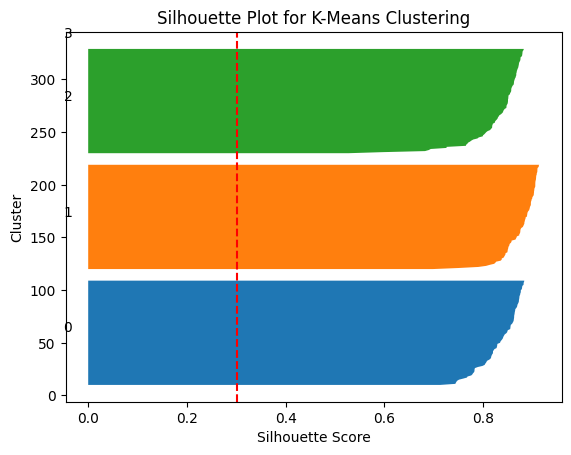

In [79]:
# 시각화 준비
y_lower = 10
for i in range(4): # 각 클러스터에 대해 반복
    ith_cluster_silhouette_values = silhouette_values[cluster_label == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    # 클러스터별 막대 그리기
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0,
ith_cluster_silhouette_values)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # 클러스터 번호
    y_lower = y_upper + 10 # 다음 클러스터로 이동
# 그래프 설정
plt.axvline(x=silhouette_avg, color="red", linestyle="--") # 평균 실루엣 점수
plt.title("Silhouette Plot for K-Means Clustering")
plt.xlabel("Silhouette Score")
plt.ylabel("Cluster")
plt.show()


# PCA 예제

In [81]:
# 필요한 라이브러리 import
import numpy as np  #계산
import matplotlib.pyplot as plt # 차트
from sklearn.decomposition import PCA  #PCA사용
from sklearn.datasets import load_iris # 4차원 데이터
from sklearn.preprocessing import StandardScaler # 표준화

In [82]:
iris = load_iris()

X = iris.data # 특성 데이터 (4차원)
y = iris.target #타깃 데이터 0, 1, 2


In [83]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [84]:
pca = PCA(n_components=2)

In [85]:
X_pca = pca.fit_transform(X_scaled)

In [86]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


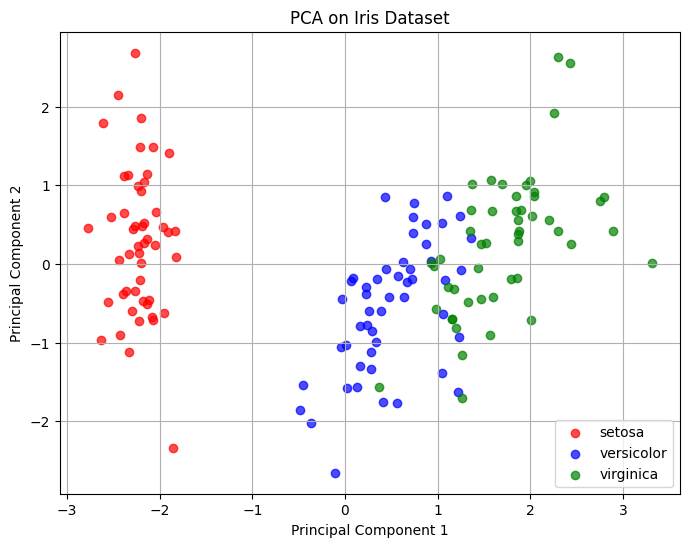

In [87]:
# 5. PCA 결과 시각화
# - 두 개의 주성분을 사용해 데이터를 2D 플롯으로 시각화
plt.figure(figsize=(8, 6))
for target, color, label in zip([0, 1, 2], ['red', 'blue', 'green'],iris.target_names):
    plt.scatter(X_pca[y == target, 0], # 첫 번째 주성분
    X_pca[y == target, 1], # 두 번째 주성분
    color=color, label=label, alpha=0.7)
plt.title('PCA on Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()

In [88]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt


In [89]:
np.random.seed(42)

In [93]:
# 정상 100개, 이상 10개 -> 2차원 데이터
normal_traffic = np.random.normal(loc=50,scale=10,size=(100,2))
#print(normal_traffic)
ano_traffic = np.random.uniform(low=100,high=150,size=(10,2))
print(ano_traffic)

[[125.29443394 130.57271177]
 [100.90550919 143.60619545]
 [146.60591412 128.25665918]
 [134.83254119 146.12496906]
 [135.36193172 107.62695215]
 [128.81441801 130.33575232]
 [121.20653357 136.82221178]
 [146.71835074 146.27842565]
 [122.54196857 105.66190229]
 [149.24205995 141.94490432]]


In [96]:
traffic_data = np.vstack((normal_traffic,ano_traffic))
traffic_df = pd.DataFrame(traffic_data,columns=['Request Count','Response Time'])


In [119]:
model = IsolationForest(n_estimators=100,contamination=0.09, random_state=42)# 10% 이상치 처리.

In [99]:
traffic_df['Anomaly Score'] = model.fit_predict(traffic_data)

In [108]:
traffic_df['Request Count'].min()
traffic_df['Request Count'].max()

np.float64(149.24205994811672)

In [109]:
traffic_df.describe()

,Request Count,Response Time,Anomaly Score
count,110.000000,110.000000,110.000000
mean,57.352687,56.352803,0.800000
std,25.736744,26.132399,0.602746
min,25.283555,26.980788,-1.000000
25%,44.115117,41.454760,1.000000
50%,52.476685,49.444338,1.000000
75%,58.611275,57.675258,1.000000
max,149.242060,146.278426,1.000000


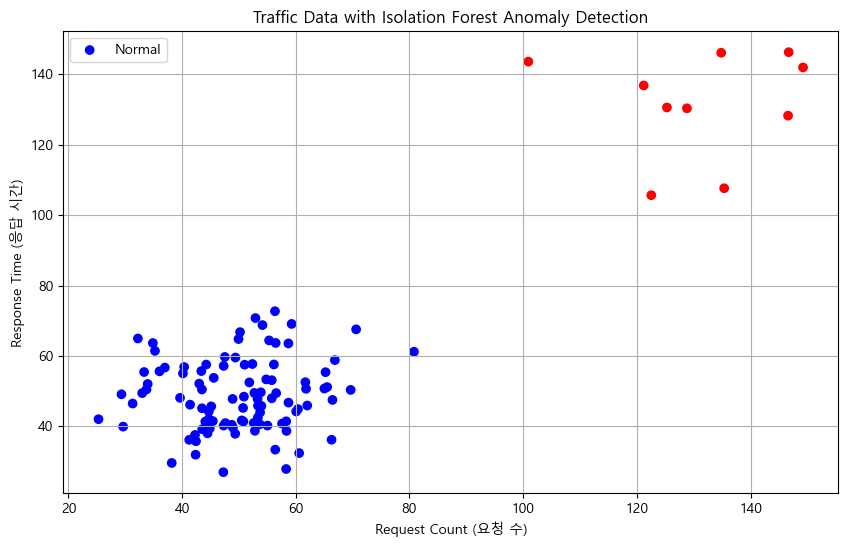

전체 데이터와 이상 탐지 결과:
     Request Count  Response Time  Anomaly Score  Cluster  Anomaly
0        53.323140      42.515135              1        0   Normal
1        65.511520      51.156746              1        0   Normal
2        61.792972      50.675185              1        0   Normal
3        70.607479      67.553408              1        0   Normal
4        47.510359      59.715710              1        0   Normal
..             ...            ...            ...      ...      ...
105     128.814418     130.335752             -1       -1  Anomaly
106     121.206534     136.822212             -1       -1  Anomaly
107     146.718351     146.278426             -1       -1  Anomaly
108     122.541969     105.661902             -1       -1  Anomaly
109     149.242060     141.944904             -1       -1  Anomaly

[110 rows x 5 columns]


In [144]:
plt.figure(figsize=(10, 6))
plt.scatter(
traffic_df["Request Count"], traffic_df["Response Time"],
c=traffic_df['Anomaly'].map({"Normal": "blue", "Anomaly":
"red"}), # 색상 매핑
label='Traffic'
)
plt.title("Traffic Data with Isolation Forest Anomaly Detection")
plt.xlabel("Request Count (요청 수)")
plt.ylabel("Response Time (응답 시간)")
plt.legend(["Normal", "Anomaly"])
plt.grid()
plt.show()
# 5. 결과 출력
# 전체 데이터프레임을 출력하여 정상/비정상 데이터 확인
print("전체 데이터와 이상 탐지 결과:")
print(traffic_df)

In [120]:
from sklearn.cluster import DBSCAN

In [121]:
dbscan = DBSCAN(eps=15, min_samples=5)

In [123]:
traffic_df['Cluster'] = dbscan.fit_predict(traffic_df)

In [124]:
print(traffic_df)

     Request Count  Response Time  Anomaly Score  Cluster
0        53.323140      42.515135              1        0
1        65.511520      51.156746              1        0
2        61.792972      50.675185              1        0
3        70.607479      67.553408              1        0
4        47.510359      59.715710              1        0
..             ...            ...            ...      ...
105     128.814418     130.335752             -1       -1
106     121.206534     136.822212             -1       -1
107     146.718351     146.278426             -1       -1
108     122.541969     105.661902             -1       -1
109     149.242060     141.944904             -1       -1

[110 rows x 4 columns]


In [135]:
traffic_df['Anomaly'] = traffic_df['Cluster'].apply(lambda x: 'Anomaly' if x == -1 else 'Normal')


In [130]:
print(traffic_df)

     Request Count  Response Time  Anomaly Score  Cluster  Anomaly
0        53.323140      42.515135              1        0    Nomal
1        65.511520      51.156746              1        0    Nomal
2        61.792972      50.675185              1        0    Nomal
3        70.607479      67.553408              1        0    Nomal
4        47.510359      59.715710              1        0    Nomal
..             ...            ...            ...      ...      ...
105     128.814418     130.335752             -1       -1  Anomaly
106     121.206534     136.822212             -1       -1  Anomaly
107     146.718351     146.278426             -1       -1  Anomaly
108     122.541969     105.661902             -1       -1  Anomaly
109     149.242060     141.944904             -1       -1  Anomaly

[110 rows x 5 columns]


In [137]:
anomalous_data = traffic_df[traffic_df['Anomaly'] == 'Anomaly'] # 또는 Cluster 가 -1이면


In [138]:
min_request_count = anomalous_data["Request Count"].min()
max_request_count = anomalous_data["Request Count"].max()
min_response_time = anomalous_data["Response Time"].min()
max_response_time = anomalous_data["Response Time"].max()



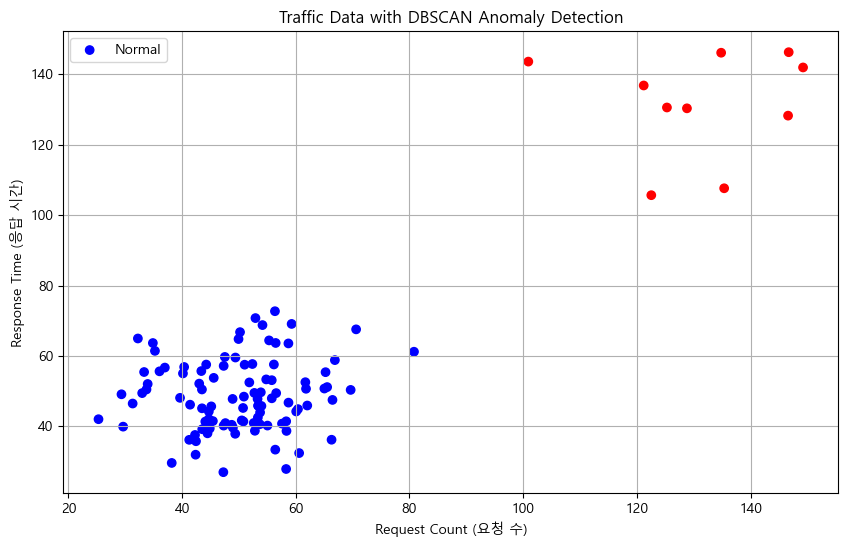

In [142]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.figure(figsize=(10, 6))
plt.scatter(
traffic_df["Request Count"], traffic_df["Response Time"],
c=traffic_df['Anomaly'].map({"Normal": "blue", "Anomaly":
"red"}), # 색상 매핑
label="Traffic"
)
plt.title("Traffic Data with DBSCAN Anomaly Detection")
plt.xlabel("Request Count (요청 수)")
plt.ylabel("Response Time (응답 시간)")
plt.legend(["Normal", "Anomaly"])
plt.grid()
plt.show()

In [145]:
#github연동